In [ ]:
# geometrically svd can be thought as a series of transformations,  where v.T matrix is a rotation matrix
# sigma is a scaling matrix and U is again a rotation matrix.

In [1]:
# a rotation matrix always has 1 as singular values 

SINGULAR VALUE DECOMPOSITION

In [1]:
import pandas as pd 
import numpy as np

In [2]:
np.set_printoptions(precision=4  , suppress=  True)

In [3]:
a = np.array([[1, 2, 3, 4], [1 ,1 , 2, 3] , [0,  1 , 1 ,0]])
print(a)

[[1 2 3 4]
 [1 1 2 3]
 [0 1 1 0]]


In [4]:
# the sigular value decomposition of this matrix

In [5]:
u  , s , vh  = np.linalg.svd(a , full_matrices= True)  # vh matrix is the transposed v matrix 
u.shape , s.shape , vh.shape
# s is an array contatining singular values of a 

((3, 3), (3,), (4, 4))

constructing the sigma matrix

In [6]:
sd = np.diag(s) # <= create  3*3 diagonal matrix with the diagonal entries as singular values of a 
b = np.zeros((3, 4))
b[:, :-1]= sd #assigning first 3 columns of b to be that of sd
# now b is the required sigma matrix 

reconstructing the a matrix

In [7]:
np.dot(u , np.dot(b , vh))

array([[ 1.,  2.,  3.,  4.],
       [ 1.,  1.,  2.,  3.],
       [ 0.,  1.,  1., -0.]])

2 rank approximation of a

In [8]:
# we take only the first 2 singular values of a 

In [9]:
s2 = s[:2] #-<-- array containing only 2 singualr values of a 

In [10]:
# constructing the sigma matrix with 2 singular values
i =np.diag(s2)
sigma_2  = np.zeros((3,4))
sigma_2[:2,:2] = i # sigma_2 is the required matrix
sigma_2

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [11]:
A_rank2  = np.dot(u.dot(sigma_2) , vh)
print(A_rank2) # rank 2 approximation of a
print(a)

[[ 1.096   1.9567  3.0526  3.9542]
 [ 0.8764  1.0558  1.9322  3.0589]
 [-0.0559  1.0252  0.9693  0.0267]]
[[1 2 3 4]
 [1 1 2 3]
 [0 1 1 0]]


LOW RANK MATRIX APPROXIMAITON (IMAGES EXAMPLE)

In [18]:
import cv2 as cv
from imageio import io
from skimage.color import rgb2gray
from PIL import Image
import matplotlib as plt 

ModuleNotFoundError: No module named 'imageio'

In [8]:
my_img = io.imread("red avadavat.jpg")
io.imshow(my_img)
gray_image_matrix = rgb2gray(my_img)
print(my_img.shape , gray_image_matrix.shape)
io.imshow(gray_image_matrix)

FileNotFoundError: No such file: 'C:\Users\Joshi Mayuresh\Desktop\essential mathmatics for machine learning python codes\red avadavat.jpg'

In [9]:
# scaling before svd

In [10]:
gray_image_matrix_scaled = (gray_image_matrix - gray_image_matrix.mean())/gray_image_matrix.std()

NameError: name 'gray_image_matrix' is not defined

In [12]:
# perform svd using np.linalg.svd
U , s_array , Vh = np.linalg.svd(gray_image_matrix_scaled)

NameError: name 'gray_image_matrix_scaled' is not defined

In [16]:
s_array == np.zeros((1 , 1391)) # to check whether s_array has 0 singular values
s1 = np.diag(s_array)
s2 = np.zeros(((1391, 2088)))
s2[: , :1391] = s1 #s2 is the required sigma matrix

NameError: name 's_array' is not defined

In [130]:
#using low-rank matrix approximation, to construct a rank k approximation of gray_image_matrix_scaled, which 
#is having rank 1391( since s_array has no non zero entry)

In [24]:
reconst_img_k = U[: , :11].dot(np.dot(s2[:11 , :11] , Vh[:11 ,:])) #k rank approximation of gray_image_matrix_scaled 

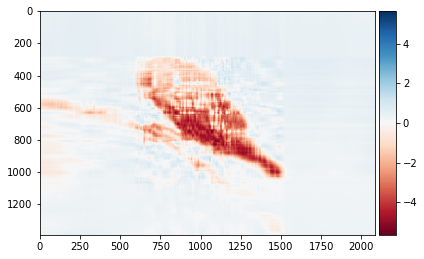

In [17]:
io.imshow(reconst_img_k)

In [18]:
# can this feature capture the shape of the bird ?

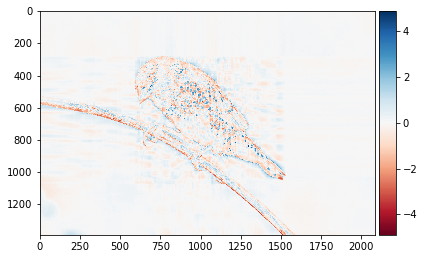

In [21]:
# error 
io.imshow(gray_image_matrix_scaled  - reconst_img_k)